# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 7/12/2022
* Student Name: Davi Meran
* Student Net ID: dm5tv
* This URL: https://github.com/DaviM26/MonteCarloSimulator/tree/main/SimulationExampleNotebook
* GitHub Repo URL: https://github.com/DaviM26/MonteCarloSimulator

# The Monte Carlo Module

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pylab as plt

class Die: 
    '''A die has N sides, or “faces”, and W weights, and can be rolled to select a face. '''

    def __init__(self, faces):
        '''This is a die setting method. Input the number of faces and the program will create 
        a dataframe with those faces.
        The program assumes all starting weights to be = 1 '''

        self.faces = faces
        self.weights = [1 for x in self.faces]
        self.df = pd.DataFrame({"faces": self.faces, "weights": self.weights})

    def change_weight(self, face, weight):
        '''This method is used to change the weight of a specific corresponding face. 
        Do this by inputting the desired face and new weight.
        Face must be valid element of faces and weight must be convertable into a float and >= 0 '''

        if (face in self.faces):
            weight = float(weight)
            if (type(weight) == float and weight >= 0):
                a = self.df[self.df["faces"] == face].index.tolist()
                row_index = a[0]
                self.df.iloc[row_index, 1] = weight
            else:
                print("weight can't be converted into a float or not >= 0")
        else:
            print("the face you entered is not valid. Please try again")

    def rolls(self, n=1):
        '''This method takes in n and returns n outcomes given n die 
        rolls with previously given faces and weights'''
        
        n = int(n)
        if (n>0):
            faces_array = np.array(self.df.faces)
            weights_array = np.array(self.df.weights)
        # generate outcomes
            return random.choices(faces_array, weights = weights_array, k = n)
        else:
            print("n, number of rolls, must be an integer > 0. Please try again")

    def print_df(self):
        '''prints the current data frame for the user to see'''
        return self.df
        

class Game:
    '''A game consists of rolling of one or more 
    dice of the same kind one or more times. '''

    def __init__(self, list_die):
        '''initializer takes in a list of similar die objects. 
        Must input a list of die.
        Will not work if input a non list die'''
        self.list_die = list_die
        # # check if all die faces are the same
        # all_die_faces_same = all(element == die.faces[0] for element in die.faces)
        # if (all_die_faces_same):
        #     self.die = die
        # else:
        #     print("error: die faces are not all the same")

    def return_faces(self):
        '''returns faces'''
        return self.list_die[0].print_df().faces
    
    def play(self, num_rolls):
        '''play takes in n die rolls and then rolls them
        Takes a parameter to specify how many times the dice should be rolled.
        Saves the result of the play to a private dataframe of shape N rolls by M dice.
        The private dataframe should have the roll number is a named index.'''

        self.roll_outcomes_list = []

        for i in range(len(self.list_die)):
            die_instance = self.list_die[i]
            die_df = die_instance.print_df()

            roll_outcomes = die_instance.rolls(num_rolls)
            self.roll_outcomes_list.append(roll_outcomes)

        self.df_roll_outcomes = pd.DataFrame(self.roll_outcomes_list)
        # return self.df_roll_outcomes

        ### the outcome data frame will have col names/index as roll numbers and row names/index as instance numbers


    def show(self, narrow_or_wide = "wide"):
        '''Takes a parameter to return the dataframe in narrow or wide form, default = wide.
        
        The narrow form of the dataframe will have a two-column index 
        with the roll number and the die number, 
        and a column for the face rolled.

        The wide form of the dataframe will a single column index 
        with the roll number, and each die number as a column.
        '''

        if (narrow_or_wide == "wide"):
            ## make data wide (data already in wide form from .play())
            self.df_to_show = self.df_roll_outcomes
            self.key_to_show = "Columns = roll number; Rows = die number"

        if (narrow_or_wide == "narrow"):
            ##make data narrow
            self.df_to_show = self.df_roll_outcomes.T
            self.key_to_show = "Columns = die number; Rows = roll number"
        
        # print(self.key_to_show)
        return self.df_to_show
        

class analyzer:
    '''An analyzer takes the results of a single game and 
    computes various descriptive statistical properties about it'''
    
    def __init__(self, game_object):
        '''Takes a game object as its input parameter. '''
        self.game_object = game_object
        self.outcome_df = self.game_object.show("wide")
        self.narrow_outcome_df = self.game_object.show("narrow")

        self.faces = game_object.return_faces()
        self.type_of_game = type(self.faces)

        self.num_faces = len(game_object.return_faces())

    
    def jackpot(self):
        '''compute and return how many times the game 
        resulted in all faces being identical
        stores result in dataframe'''
        
        answer = 0
        for i in range(len(self.game_object.show("narrow"))):
            if (self.outcome_df[i] == self.outcome_df[i][0]).all():
                answer += 1
        return answer

    def combo(self):
        '''compute the distinct combinations of faces rolled, 
        along with their counts'''
        df = self.outcome_df

        combinations_list = []
        for i in range(len(df.T)):
            TEMP = [x for x in df[i]]
            combinations_list.append(tuple(TEMP))

        combinations_df = pd.DataFrame({"Combination_of_Faces": combinations_list})
        
        Combo_DF = combinations_df.apply(lambda x: pd.Series(sorted(x)), 1)\
            .value_counts().to_frame('count')

        return Combo_DF     

    def face_counts_per_roll(self):
        ''' compute how many times a given face is rolled in each event'''
        df = self.outcome_df

        def get_instances(data, instance):
            df_list = data.values.tolist()
            return sum([index.count(instance) for index in df_list])
        

        instance_list = [get_instances(df, x) for x in self.faces]
        
        newdf = pd.DataFrame({
            "face": self.faces,
            "count": instance_list
        })

        return newdf
 

# Test Module

In [2]:
import unittest


class die_test(unittest.TestCase):
    '''Unit Test to test the die class'''
    def test_change_weight(self):
        '''Test if the change_weight function works'''
        die_object = Die(["A", "B", "C"])
        die_object.change_weight("A", 2)
        df = die_object.print_df()["weights"]
        df = list(df)
        testValue = [2,1,1]

        message = "Weight Not Changed"

        self.assertEqual(testValue, df, message)


    def test_rolls(self):
        '''test if the rolls function works'''
        die_object = Die(["A", "B", "C"])
        roll_object = die_object.rolls(10)
        testValue = len(roll_object)

        message = "Rolls doesn't work"

        self.assertEqual(testValue, 10, message)

    def test_print_df(self):
        '''test if the print_df function works'''
        die_object = Die(["A", "B", "C"])
        df = die_object.print_df()
        if (type(df) == pd.DataFrame):
            testValue = True
        else:
            testValue == False

        message = "print_df doesn't work"
        self.assertTrue(testValue, message)
    


class game_test(unittest.TestCase):
    '''Unit test to test game class'''
    def test_return_faces(self):
        '''tests if return_faces returns the correct faces'''
        die_object = Die(["a", "b"])
        game_object = Game([die_object])
        testValue = (list(game_object.return_faces()) == ["a", "b"])
        
        message = "return_faces does not return the correct faces"
        self.assertTrue(testValue, message)

    def test_play(self):
        '''test if play returns the correct outcomes'''
        die_object = Die(["a", "b"])
        game_object = Game([die_object])
        game_object.play(5)
        testValue = (game_object.show().shape == (1,5))

        message = "play does not return the correct values"
        self.assertTrue(testValue, message)

    def test_show(self):
        '''test if show returns the correct dataframe'''
        die_object = Die(["a", "b"])
        game_object = Game([die_object])
        game_object.play(5)
        test1 = (game_object.show().shape == (1,5))
        test2 = (type(game_object.show()) == pd.DataFrame)
        testValue = test1 + test2

        message = "show does not return the correct data frame"
        self.assertEqual(testValue, 2, message)



class analyzer_test(unittest.TestCase):
    '''this class tests the analyzer class'''
    def test_jackpot(self):
        '''this tests the jackpot method to see if it returns the correct values'''
        die_object = Die(["a","a"])
        game_object = Game([die_object, die_object])
        game_object.play(3)
        x = analyzer(game_object).jackpot()
        testValue = (x == 3)

        message = "the jackpot method failed to return the correct result"
        self.assertTrue(testValue, message)
        
    def test_combo(self):
        '''this tests the combo method to make sure it returns the correct output'''
        die_object = Die(["a","a"])
        game_object = Game([die_object, die_object])
        game_object.play(2)
        combo = analyzer(game_object).combo()
        # x = (combo[0] == 2)
        y = (type(analyzer(game_object).combo()) == pd.DataFrame)
        # z = x + y

        message = "the combo method failed to return the correct values"
        self.assertEqual(y, 1, message)
    

    def test_face_counts_per_roll(self):
        '''This tests the face counts per roll method to make sure it returns the correct output'''
        die_object = Die(["a","a"])
        game_object = Game([die_object, die_object])
        game_object.play(2)
        x = analyzer(game_object).face_counts_per_roll()
        testValue = (type(x) == pd.DataFrame)

        message = "the face count per roll method failed to return the correct output"
        self.assertTrue(testValue, message)




# Test Results

In [3]:
# test_combo (__main__.analyzer_test)
# this tests the combo method to make sure it returns the correct output ... ok
# test_face_counts_per_roll (__main__.analyzer_test)
# This tests the face counts per roll method to make sure it returns the correct output ... ok
# test_jackpot (__main__.analyzer_test)
# this tests the jackpot method to see if it returns the correct values ... ok
# test_change_weight (__main__.die_test)
# Test if the change_weight function works ... ok
# test_print_df (__main__.die_test)
# test if the print_df function works ... ok
# test_rolls (__main__.die_test)
# test if the rolls function works ... ok
# test_play (__main__.game_test)
# test if play returns the correct outcomes ... ok
# test_return_faces (__main__.game_test)
# tests if return_faces returns the correct faces ... ok
# test_show (__main__.game_test)
# test if show returns the correct dataframe ... ok

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.

Play a game of 1000 flips of three coins with all fair dice.

Play a game of 1000 flips with two unfair dice and one fair die.

For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.

Compute relative frequency as the number of jackpots over the total number of rolls.

Show your results, comparing the two relative frequencies, in a simple bar chart.

Run the below command "import MonteCarloModules" if modules need to be imported. This is not necessary here as the modules are defined above.

In [4]:
# import MonteCarloModules 

In [5]:
#Create coins
fair_coin = Die(["H", "T"])
unfair_coin = Die(["H", "T"]) #Heads bias 5 to 1
unfair_coin.change_weight("H", 5)

In [6]:
# calculate fair coin jackpot
fair_coin_game = Game([fair_coin, fair_coin, fair_coin])
fair_coin_game.play(1000)
fair_analysis = analyzer(fair_coin_game)
fair_jackpot = fair_analysis.jackpot()
fair_jackpot

237

In [7]:
#calculate fair coin jackpot frequency
fair_jackpot_frequency = fair_jackpot/1000
fair_jackpot_frequency

0.237

In [8]:
#calculate unfair coin jackpot
unfair_coin_game = Game([fair_coin, unfair_coin, unfair_coin])
unfair_coin_game.play(1000)
unfair_analysis = analyzer(unfair_coin_game)
unfair_jackpot = unfair_analysis.jackpot()
unfair_jackpot

378

In [9]:
# calculate unfair jackpot frequency
unfair_jackpot_frequency = unfair_jackpot/1000 
unfair_jackpot_frequency

0.378

<BarContainer object of 2 artists>

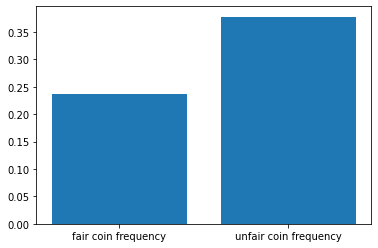

In [10]:
# bar chart to compare
X_axis = ["fair coin frequency", "unfair coin frequency"]
y_axis = [fair_jackpot_frequency, unfair_jackpot_frequency]
plt.bar(X_axis, y_axis)

## Scenario 2

Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. 

One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). 

The other unfair die (Type 2) will  weight 1 five times more than the others.


Play a game of 10000 rolls with 5 fair dice.

Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.

For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

In [11]:
# fair and unfair die setup
fair_die = Die(["1","2","3","4","5","6"])

unfair_die_6 = Die(["1","2","3","4","5","6"])
unfair_die_6.change_weight("6", 5)

unfair_die_1 = Die(["1","2","3","4","5","6"])
unfair_die_1.change_weight("1",5)

In [12]:
# fair die game calculations, analysis
fair_die_game = Game([fair_die, fair_die, fair_die, fair_die, fair_die])
fair_die_game.play(10000)
analysis_fair_die = analyzer(fair_die_game)
fair_die_jackpot = analysis_fair_die.jackpot()
fair_die_jackpot

10

In [13]:
# unfair die game calculations, analysis
unfair_die_game = Game([unfair_die_6, unfair_die_6, unfair_die_1, fair_die, fair_die])
unfair_die_game.play(10000)
analysis_unfair_die = analyzer(unfair_die_game)
unfair_die_jackpot = analysis_unfair_die.jackpot()
unfair_die_jackpot 

9

<BarContainer object of 2 artists>

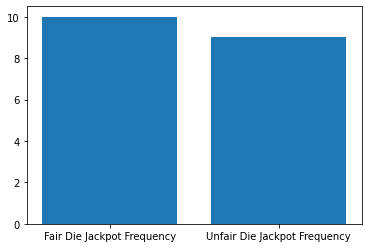

In [14]:
# jackpot graph
x_axis_die = ["Fair Die Jackpot Frequency", "Unfair Die Jackpot Frequency"]
y_axis_die = [fair_die_jackpot, unfair_die_jackpot]
plt.bar(x_axis_die, y_axis_die)

In [15]:
# Fair Frequency Data
fair_freq = analysis_fair_die.combo().head(10)
fair_freq

,count
0,
"(1, 1, 3, 1, 5)",8
"(1, 2, 5, 3, 5)",7
"(2, 3, 4, 6, 2)",7
"(3, 1, 1, 3, 3)",7
"(5, 2, 3, 6, 4)",6
"(5, 3, 3, 2, 1)",6
"(3, 5, 4, 1, 3)",6
"(1, 1, 1, 6, 5)",6
"(6, 6, 2, 6, 2)",6


<AxesSubplot:title={'center':'fair die game combos'}, xlabel='combos'>

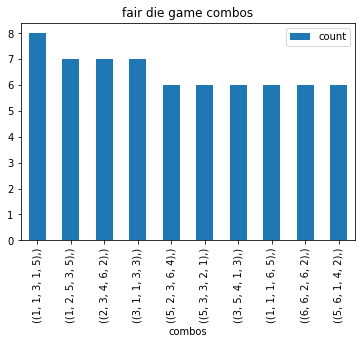

In [16]:
# Fair Frequency Graph
fair_freq.plot.bar(xlabel = "combos", title = "fair die game combos")

In [17]:
# Unfair Frequency Data
unfair_freq = analysis_fair_die.combo().head(10)
unfair_freq

,count
0,
"(1, 1, 3, 1, 5)",8
"(1, 2, 5, 3, 5)",7
"(2, 3, 4, 6, 2)",7
"(3, 1, 1, 3, 3)",7
"(5, 2, 3, 6, 4)",6
"(5, 3, 3, 2, 1)",6
"(3, 5, 4, 1, 3)",6
"(1, 1, 1, 6, 5)",6
"(6, 6, 2, 6, 2)",6


<AxesSubplot:title={'center':'unfair die game combos'}, xlabel='combos'>

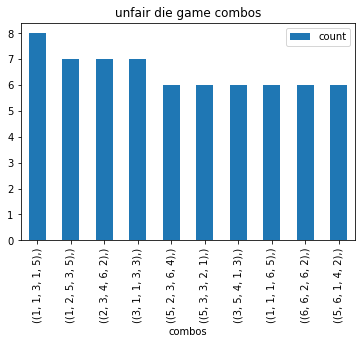

In [18]:
# Unfair Frequency Graph
unfair_freq.plot.bar(xlabel = "combos", title = "unfair die game combos")

## Scenario 3

Create a "die" of letters from a to z with weights based on their frequency of usage. 

See Appendix for these weights.

Play a game involving 5 of these dice with 1000 rolls.

How many combos can you that look like actual English words?

NOTE: "combo" here should really be permutation, which make sense for words. 

So just compute these from the result data you get from the Game object.

Based on your eye count, what is the relative frequency of these words versus the rest?

NOTE: You can do a few random sample to compute your estimate.

The weights for the letters are in the Appendix to this document.

In [19]:
# Load in data
letters = pd.read_csv("letter-freqs.csv")
letters

,Letter,Frequency
0,A,8.4966
1,B,2.0720
2,C,4.5388
3,D,3.3844
4,E,11.1607
5,F,1.8121
6,G,2.4705
7,H,3.0034
8,I,7.5448
9,J,0.1965


In [20]:
# Isolate letters and frequencies for calculations
letters_list = list(letters["Letter"])
frequency_list = [letters.iloc[x][1] for x in range(len(letters_list))]

In [21]:
# create die and change weights
letters_die = Die(letters_list)

for i in range(26):
    temp_letter = letters_list[i]
    temp_freq = frequency_list[i]
    letters_die.change_weight(temp_letter, temp_freq)

In [22]:
# run simulation/game
letter_game = Game([letters_die, letters_die, letters_die, letters_die, letters_die])
letter_game.play(1000)

My combo method actually calculates permutations. 

 is because I interpreted the instructions for the combo function to consider 

rolling a 1 then a 2 to be different than rolling a 2 then a 1, for example. 

Therefore, the combo function works in this case.  

In [23]:
# calculate permutations
analyze_letters = analyzer(letter_game)
analyze_letters.combo().head(20)

,count
0,
"(S, T, E, E, E)",2
"(A, A, A, E, E)",1
"(P, A, P, V, D)",1
"(O, T, R, B, N)",1
"(O, U, E, I, P)",1
"(O, U, O, I, O)",1
"(O, U, R, L, E)",1
"(O, V, M, I, R)",1
"(O, W, I, D, I)",1


Run the algo 10 times and count the number of words that appear. Each run creates 20 combinations. 

8, 6, 11, 10, 7, 5, 9, 7, 8, 6

In [24]:
# Calculate average count "almost" words
import statistics
avg_words = statistics.mean([8,6,11,10,7,5,9,7,8,6])
avg_words

7.7

In [25]:
# relative frequency approximation
avg_words/20

0.385

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [26]:
!ls -lRF -o

total 192
-rw-r--r--@ 1 davimeran  87911 Jul 15 23:57 FinalProjectSubmission_DaviMeran.ipynb
drwxr-xr-x  7 davimeran    224 Jul 15 23:35 MonteCarlo/
drwxr-xr-x  6 davimeran    192 Jul 15 23:37 MonteCarlo.egg-info/
-rw-r--r--@ 1 davimeran    278 Jul 15 19:47 letter-freqs.csv
-rw-r--r--@ 1 davimeran    324 Jul 15 23:05 setup.py

./MonteCarlo:
total 32
-rw-r--r--@ 1 davimeran  6480 Jul 15 22:47 MonteCarloModules.py
-rw-r--r--@ 1 davimeran  3977 Jul 15 23:18 UnitTest.py
-rw-r--r--@ 1 davimeran   862 Jul 14 21:21 UnitTestTextOutput
-rw-r--r--  1 davimeran     0 Jul 15 23:17 __init__.py

./MonteCarlo.egg-info:
total 32
-rw-r--r--  1 davimeran  277 Jul 15 23:37 PKG-INFO
-rw-r--r--  1 davimeran  144 Jul 15 23:37 SOURCES.txt
-rw-r--r--  1 davimeran    1 Jul 15 23:37 dependency_links.txt
-rw-r--r--  1 davimeran   18 Jul 15 23:37 top_level.txt


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [27]:
pip install -e .

Obtaining file:///Users/davimeran/Desktop/DS5100/final_project
  Attempting uninstall: MonteCarlo
    Found existing installation: MonteCarlo 1.0
    Uninstalling MonteCarlo-1.0:
      Successfully uninstalled MonteCarlo-1.0
  Running setup.py develop for MonteCarlo
Note: you may need to restart the kernel to use updated packages.
